<a href="https://colab.research.google.com/github/yweng-31/fastai-pytorch/blob/master/chinese_calligraphy.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
!pip install fastai --upgrade -q
import fastbook
fastbook.setup_book()
from fastbook import *
from fastai.vision.widgets import *


Mounted at /content/gdrive


In [4]:
#define different classes
classes = ['lishu','kaishu','xiaozhuan']

In [5]:
#set up folders for different types of calligraphy and download the images from the URLs
folder='lishu'
file="lishu.csv"
path=Path('/content/sample_data'')
dest=path/folder
dest.mkdir(parents=True, exist_ok=True)
download_images(dest, path/file, max_pics=200)

# New Section

# New Section

In [6]:
folder='xiaozhuan'
file="xiaozhuan.csv"
path=Path('/content/sample_data')
dest=path/folder
dest.mkdir(parents=True, exist_ok=True)
download_images(dest, path/file, max_pics=200)

In [7]:
folder='kaishu'
file="kaishu.csv"
path=Path('/content/sample_data')
dest=path/folder
dest.mkdir(parents=True, exist_ok=True)
download_images(dest, path/file, max_pics=200)

In [9]:
#write a loop for the previous three blocks
calligraphy_types = 'lishu','kaishu','xiaozhuan'
if not path.exists():
    path.mkdir()
    for o in calligraphy_types:
        dest = (path/o)
        dest.mkdir(exist_ok=True)
        download_images(dest, urls=results.attrgot('contentUrl'))

In [10]:
#paths of total images
fns = get_image_files(path)
fns

(#480) [Path('/content/sample_data/kaishu/00000003.jpg'),Path('/content/sample_data/kaishu/00000066.jpg'),Path('/content/sample_data/kaishu/00000144.jpg'),Path('/content/sample_data/kaishu/00000104.jpg'),Path('/content/sample_data/kaishu/00000151.jpg'),Path('/content/sample_data/kaishu/00000063.jpg'),Path('/content/sample_data/kaishu/00000065.jpg'),Path('/content/sample_data/kaishu/00000161.jpg'),Path('/content/sample_data/kaishu/00000040.jpg'),Path('/content/sample_data/kaishu/00000174.jpg')...]

In [11]:
#check if there are any images could not be opened
failed = verify_images(fns)
failed

(#0) []

In [12]:

calligraphy = DataBlock(
    blocks=(ImageBlock, CategoryBlock), 
    get_items=get_image_files, 
    splitter=RandomSplitter(valid_pct=0.2, seed=42),
    get_y=parent_label,
    item_tfms=Resize(128))

In [13]:
dls = calligraphy.dataloaders(path)
dls

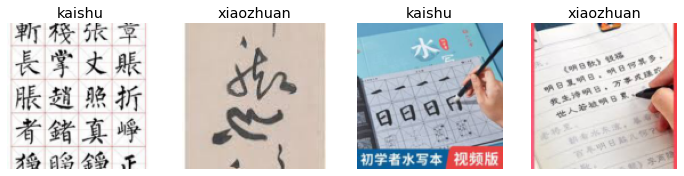

In [14]:
dls.valid.show_batch(max_n=4, nrows=1)

In [15]:
calligraphy = calligraphy.new(
    item_tfms=RandomResizedCrop(224, min_scale=0.5),
    batch_tfms=aug_transforms())
dls = calligraphy.dataloaders(path)

In [16]:
learn = cnn_learner(dls, resnet18, metrics=error_rate)
learn.fine_tune(4)

Downloading: "https://download.pytorch.org/models/resnet18-5c106cde.pth" to /root/.cache/torch/hub/checkpoints/resnet18-5c106cde.pth


epoch,train_loss,valid_loss,error_rate,time
0,1.711282,1.297234,0.531250,01:23


epoch,train_loss,valid_loss,error_rate,time
0,1.500041,1.123682,0.468750,01:55
1,1.349562,1.107104,0.427083,01:56
2,1.211354,1.102676,0.406250,01:56
3,1.083942,1.138921,0.416667,01:56


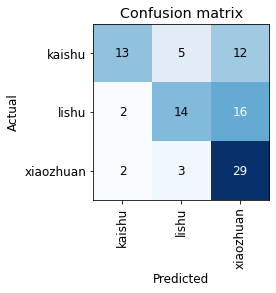

In [20]:
interp = ClassificationInterpretation.from_learner(learn)
interp.plot_confusion_matrix()

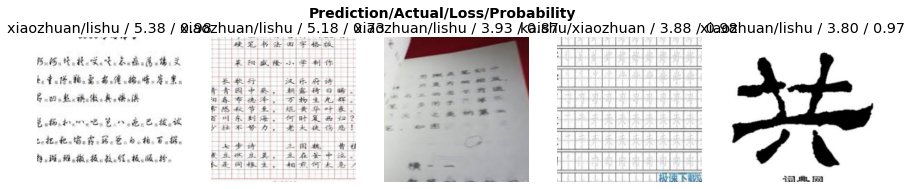

In [21]:
interp.plot_top_losses(5, nrows=1)

In [22]:
cleaner = ImageClassifierCleaner(learn)
cleaner

In [23]:
for idx in cleaner.delete(): cleaner.fns[idx].unlink()

In [24]:
for idx,cat in cleaner.change(): shutil.move(str(cleaner.fns[idx]), path/cat)

Error: ignored

In [26]:
fns = get_image_files(path)
fns

(#466) [Path('/content/sample_data/kaishu/00000003.jpg'),Path('/content/sample_data/kaishu/00000066.jpg'),Path('/content/sample_data/kaishu/00000144.jpg'),Path('/content/sample_data/kaishu/00000104.jpg'),Path('/content/sample_data/kaishu/00000151.jpg'),Path('/content/sample_data/kaishu/00000063.jpg'),Path('/content/sample_data/kaishu/00000065.jpg'),Path('/content/sample_data/kaishu/00000161.jpg'),Path('/content/sample_data/kaishu/00000040.jpg'),Path('/content/sample_data/kaishu/00000174.jpg')...]

In [27]:
calligraphy = DataBlock(
    blocks=(ImageBlock, CategoryBlock), 
    get_items=get_image_files, 
    splitter=RandomSplitter(valid_pct=0.2, seed=42),
    get_y=parent_label,
    item_tfms=Resize(128))

In [28]:
dls = calligraphy.dataloaders(path)
dls

In [29]:
learn = cnn_learner(dls, resnet18, metrics=error_rate)
learn.fine_tune(4)

epoch,train_loss,valid_loss,error_rate,time
0,2.049560,1.264797,0.494624,00:25


epoch,train_loss,valid_loss,error_rate,time
0,1.600023,1.077188,0.516129,00:35
1,1.372234,1.084708,0.494624,00:34
2,1.157738,1.199403,0.526882,00:34
3,1.001918,1.218027,0.516129,00:34
